In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('HMEQ.csv', header=None, error_bad_lines=False)

b'Skipping line 20: expected 13 fields, saw 14\nSkipping line 3740: expected 13 fields, saw 14\nSkipping line 5467: expected 13 fields, saw 17\nSkipping line 5624: expected 13 fields, saw 15\n'


In [ ]:
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,1,1100,25860,39025,HomeImp,Other,10.5,0,0,94.366666667,1,9,NaN
2,1,1300,70053,68400,HomeImp,Other,7,0,2,121.83333333,0,14,NaN
3,1,1500,13500,16700,HomeImp,Other,4,0,0,149.46666667,1,10,NaN
4,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1700,97800,112000,HomeImp,Office,3,0,0,93.333333333,0,14,NaN


In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958,5958,5440,5846,5706,5679,5444,5250,5378,5650,5448,5736,4691
unique,4,541,5049,5381,3,7,99,11,14,5310,16,62,4690
top,0,15000,42000,60000,DebtCon,Other,0,0,0,206.96666667,0,16,29.713601037
freq,4770,105,11,15,3926,2385,415,4525,4177,7,2530,316,2


In [ ]:
df.shape

(5958, 13)

In [ ]:
df.isnull().sum().values.sum()

5270

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5958 entries, 1 to 5958
Data columns (total 13 columns):
BAD        5958 non-null object
LOAN       5958 non-null object
MORTDUE    5440 non-null object
VALUE      5846 non-null object
REASON     5706 non-null object
JOB        5679 non-null object
YOJ        5444 non-null object
DEROG      5250 non-null object
DELINQ     5378 non-null object
CLAGE      5650 non-null object
NINQ       5448 non-null object
CLNO       5736 non-null object
DEBTINC    4691 non-null object
dtypes: object(13)
memory usage: 651.7+ KB


In [ ]:
df.JOB.value_counts(dropna=False)

Other      2385
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Othe          1
Name: JOB, dtype: int64

In [ ]:
df[df.JOB == 'Othe']

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2515,0,14900,45797,71942,DebtCon,Othe,11,0,0,233.67873071,0,17,33.550265214


In [ ]:
df['JOB'].loc[(df['JOB'] == 'Othe')]='Other'

In [ ]:
df.JOB.value_counts(dropna=False)

Other      2386
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64

In [ ]:
df['JOB'].loc[(df['JOB'] == 'ProfExe')]=0
df['JOB'].loc[(df['JOB'] == 'Office')]=1
df['JOB'].loc[(df['JOB'] == 'Mgr')]=2
df['JOB'].loc[(df['JOB'] == 'Self')]=3
df['JOB'].loc[(df['JOB'] == 'Sales')]=4
df['JOB'].loc[(df['JOB'] == 'Other')]=5

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,1,1100,25860,39025,HomeImp,5,10.5,0,0,94.366666667,1,9,NaN
2,1,1300,70053,68400,HomeImp,5,7,0,2,121.83333333,0,14,NaN
3,1,1500,13500,16700,HomeImp,5,4,0,0,149.46666667,1,10,NaN
4,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1700,97800,112000,HomeImp,1,3,0,0,93.333333333,0,14,NaN


In [ ]:
df.JOB.value_counts(dropna=False)

5.0    2386
0.0    1276
1.0     948
2.0     767
NaN     279
3.0     193
4.0     109
Name: JOB, dtype: int64

In [ ]:
df.REASON.value_counts(dropna=False)

DebtCon     3926
HomeImp     1779
NaN          252
DebtCons       1
Name: REASON, dtype: int64

In [ ]:
df[df.REASON == 'DebtCons']

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2298,0,13900,47741,69111,DebtCons,5,2,0,0,254.25961308,0,21,28.885618182


In [ ]:
df['REASON'].loc[(df['REASON'] == 'DebtCons')]='DebtCon'
df.REASON.value_counts(dropna=False)

DebtCon    3927
HomeImp    1779
NaN         252
Name: REASON, dtype: int64

In [ ]:
df['REASON'].loc[(df['REASON'] == 'DebtCon')]=0
df['REASON'].loc[(df['REASON'] == 'HomeImp')]=1

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,1,1100,25860,39025,1,5,10.5,0,0,94.366666667,1,9,NaN
2,1,1300,70053,68400,1,5,7,0,2,121.83333333,0,14,NaN
3,1,1500,13500,16700,1,5,4,0,0,149.46666667,1,10,NaN
4,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1700,97800,112000,1,1,3,0,0,93.333333333,0,14,NaN


In [ ]:
df.BAD.value_counts(dropna=False)

0     4770
1     1186
3        1
10       1
Name: BAD, dtype: int64

In [ ]:
df[df.BAD == '10']

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
575,10,7500,63500,86125,1,5,5,0,0,136.1,0,8,NaN


In [ ]:
df[df.BAD == '3']

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
470,3,7000,73873,111781,0,1,0,0,0,231.79991346,0,38,19.273579455


In [ ]:
df['BAD'].loc[(df['BAD'] == '3')]=np.nan
df['BAD'].loc[(df['BAD'] == '10')]=np.nan

In [ ]:
df.BAD.value_counts(dropna=False)

0      4770
1      1186
NaN       2
Name: BAD, dtype: int64

In [ ]:
df['BAD'] = df['BAD'].fillna(df['BAD'].mode()[0])

In [ ]:
df.BAD.value_counts(dropna=False)

0    4772
1    1186
Name: BAD, dtype: int64

In [ ]:
df.DEROG.value_counts(dropna=False)

0      4525
NaN     708
1       435
2       160
3        58
4        23
5        15
6        15
7         8
8         6
9         3
10        2
Name: DEROG, dtype: int64

In [ ]:
df.DELINQ.value_counts(dropna=False)

0      4177
1       654
NaN     580
2       250
3       129
4        78
5        38
6        27
7        13
8         5
11        2
10        2
13        1
15        1
12        1
Name: DELINQ, dtype: int64

In [ ]:
df.NINQ.value_counts(dropna=False)

0      2530
1      1338
2       781
NaN     510
3       391
4       156
5        75
6        56
7        44
10       28
8        22
9        11
11       10
12        2
13        2
14        1
17        1
Name: NINQ, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5958 entries, 1 to 5958
Data columns (total 13 columns):
BAD        5958 non-null object
LOAN       5958 non-null object
MORTDUE    5440 non-null object
VALUE      5846 non-null object
REASON     5706 non-null object
JOB        5679 non-null object
YOJ        5444 non-null object
DEROG      5250 non-null object
DELINQ     5378 non-null object
CLAGE      5650 non-null object
NINQ       5448 non-null object
CLNO       5736 non-null object
DEBTINC    4691 non-null object
dtypes: object(13)
memory usage: 651.7+ KB


In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958,5958,5440,5846,5706,5679,5444,5250,5378,5650,5448,5736,4691
unique,2,541,5049,5381,2,6,99,11,14,5310,16,62,4690
top,0,15000,42000,60000,0,5,0,0,0,206.96666667,0,16,29.713601037
freq,4772,105,11,15,3927,2386,415,4525,4177,7,2530,316,2


In [ ]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         514
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
df = df.apply(pd.to_numeric)
df['not_nan'] = df.apply(lambda x: x.count(), axis=1)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,not_nan
1,1,1100,25860.0,39025.0,1.0,5.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,12
2,1,1300,70053.0,68400.0,1.0,5.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,12
3,1,1500,13500.0,16700.0,1.0,5.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,12
4,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,0,1700,97800.0,112000.0,1.0,1.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,12


In [ ]:
not_nan_count = []
for n in range(14,0,-1):
    x = len(df[df.not_nan < n])
    not_nan_count.append(x)
    print(x)

5958
2595
1007
558
339
275
192
126
101
62
13
2
0
0


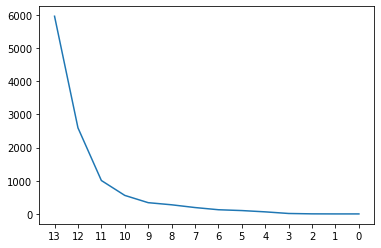

In [ ]:
plt.plot(['13','12','11','10','9','8','7','6','5','4','3','2','1','0'], not_nan_count)

In [ ]:
df.drop(df[df.not_nan < 12].index, inplace=True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,not_nan
1,1,1100,25860.0,39025.0,1.0,5.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,12
2,1,1300,70053.0,68400.0,1.0,5.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,12
3,1,1500,13500.0,16700.0,1.0,5.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,12
5,0,1700,97800.0,112000.0,1.0,1.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,12
6,1,1700,30548.0,40320.0,1.0,5.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,13


In [ ]:
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
not_nan    0
dtype: int64

In [ ]:
df = df.astype(int)
del df['not_nan']
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,1,1100,25860,39025,1,5,10,0,0,94,1,9,35
2,1,1300,70053,68400,1,5,7,0,2,121,0,14,35
3,1,1500,13500,16700,1,5,4,0,0,149,1,10,35
5,0,1700,97800,112000,1,1,3,0,0,93,0,14,35
6,1,1700,30548,40320,1,5,9,0,0,101,1,8,37


In [ ]:
df.sample(5, random_state=1)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1595,0,11500,59781,69864,0,5,4,0,1,312,0,9,31
4717,0,25000,60504,93907,0,1,1,0,0,99,0,23,33
3660,0,19200,31307,60202,0,0,18,0,0,170,1,20,35
2172,1,13500,70000,93500,0,4,25,0,0,250,0,46,35
1797,0,12200,136866,162906,1,0,4,0,0,427,0,43,30


In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4951.000000,4951.000000,4951.000000,4.951000e+03,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,0.182387,18765.905878,73599.455262,2.890128e+05,0.299535,2.600283,9.032115,0.210463,0.388810,178.899616,1.131085,21.667946,35.228035
std,0.386202,11332.720170,43932.666975,1.279297e+07,0.458101,2.096460,7.524987,0.741647,1.020649,83.824597,1.625922,9.690108,71.589325
min,0.000000,1100.000000,2619.000000,-2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.000000
25%,0.000000,11300.000000,47427.000000,6.849200e+04,0.000000,1.000000,3.000000,0.000000,0.000000,116.000000,0.000000,15.000000,30.000000
50%,0.000000,16400.000000,65030.000000,9.134200e+04,0.000000,2.000000,7.000000,0.000000,0.000000,174.000000,1.000000,21.000000,35.000000
75%,0.000000,23350.000000,90011.500000,1.211645e+05,1.000000,5.000000,13.000000,0.000000,0.000000,229.500000,2.000000,27.000000,38.000000
max,1.000000,89900.000000,399412.000000,9.001400e+08,1.000000,5.000000,41.000000,10.000000,15.000000,1168.000000,13.000000,71.000000,4537.000000


In [ ]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
df.REASON.value_counts(dropna=False)

0    3468
1    1483
Name: REASON, dtype: int64

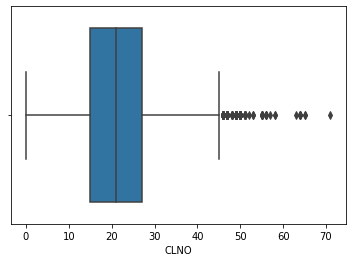

In [ ]:
sns.boxplot(df.CLNO)

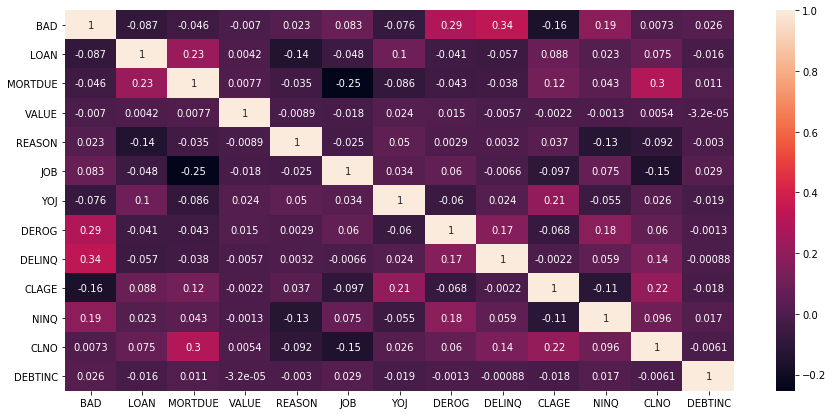

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15, 7)
sns.heatmap(data = df.corr(), annot=True, cbar=True)